<a href="https://www.kaggle.com/code/jobinvarghese1/lung-colon-cancer-detection-research-jobin?scriptVersionId=227051036" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
base_path = "/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets"
categories = ["colon_aca","colon_n"]

In [7]:
############# Convert Image Path and Labels into DataFrame###########

image_paths = [] # Empty list named image_paths to store the paths of images in kaggle folder
# image_path =/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colonca637.jpeg
labels = [] # Empty list named labels to fill the labels "colon_aca", "colon_n" corresponding to image paths in image_paths list
# label = colon_aca   --- Corresponding label for above image

for category in categories: # Categories is list ["colon_aca", "colon_n"]
        # colon_aca & colon_n are folders containing image with labels
    category_path = os.path.join(base_path, category) # Joining the folders "colon_image_sets" with subfolders "colon_aca" & "colon_n" 
    # Now we can access images from the folders "colon_aca" & "colon_n"
    # /kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca
    #/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_n
    
    for image_name in os.listdir(category_path): # Navigating through the list directory
        image_path = os.path.join(category_path, image_name)
        # To connect the folders and the image files (all "colonca637.jpeg & colonn2355.jpeg" files)
        # /kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_aca/colonca637.jpeg
        # /kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colon_n/colonn2355.jpeg
        image_paths.append(image_path) # Appending the empty list "image_paths" with paths of all images to the Kaggle repository
        labels.append(category)  # Appending the empty list "labels" with names "colon_aca" & "colon_n"

# Create a data frame having path towards each image listed under the name "image_path", and its label (colon_aca" & "colon_n) against its path
df=pd.DataFrame({"image_path": image_paths,
    "label": labels
})
# image_path =/kaggle/input/lung-and-colon-cancer-histopathological-images/lung_colon_image_set/colon_image_sets/colonca637.jpeg
# label = colon_aca   --- Corresponding label for above image

In [8]:
df.head()

image_path      label
0  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca
1  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca
2  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca
3  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca
4  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_aca

In [9]:
df.tail()

image_path    label
9995  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n
9996  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n
9997  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n
9998  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n
9999  /kaggle/input/lung-and-colon-cancer-histopatho...  colon_n

In [10]:
df.shape

(10000, 2)

In [11]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

image_path    0
label         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  10000 non-null  object
 1   label       10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [15]:
df['label'].unique()

array(['colon_aca', 'colon_n'], dtype=object)

In [16]:
df['label'].value_counts()

label
colon_aca    5000
colon_n      5000
Name: count, dtype: int64

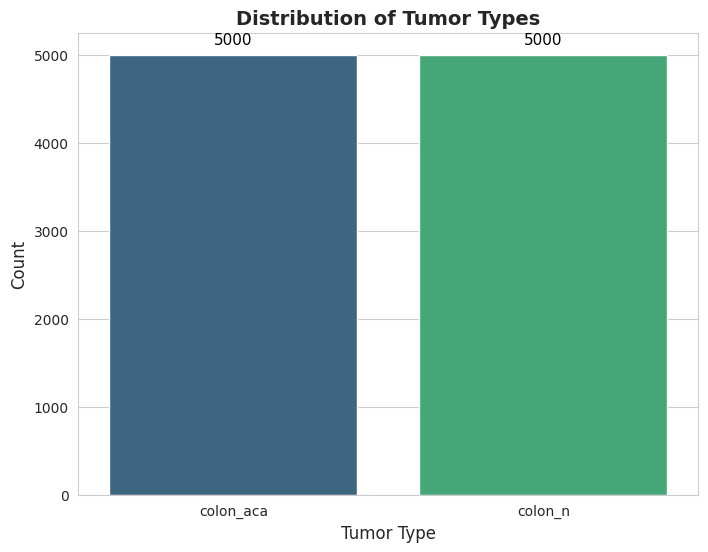

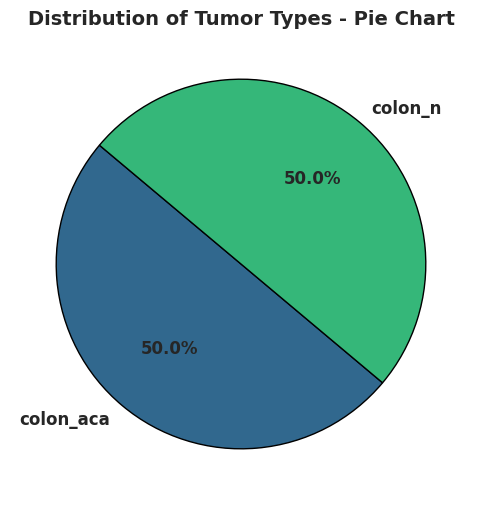

In [17]:
####### Basic Visulization ####  -- Count Plot and Pie Plot
## From Count plot it is evident that, the data set is a balanced one

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")  # Creating a whitegrid for count plot

fig, ax = plt.subplots(figsize=(8, 6)) # Creating subplots of size (8,6)
# ax is used to plot and customize the data within the figure.
# fig is used to manage the overall figure properties.
# ax is the core object for creating and customizing plots in matplotlib

sns.countplot(data=df, x="label", palette="viridis", ax=ax) 
# The function counts the number of occurrences of each unique value in the "label" column of the DataFrame df.
# It then creates a bar plot where:
    # - The x-axis represents the unique values in the "label" column.
    # - The y-axis represents the count of occurrences for each value.
#The bars are colored using the "viridis" palette.
# The plot is drawn on the Axes object ax.

ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold') # Setting title, fontsize, and fontweight
ax.set_xlabel("Tumor Type", fontsize=12) # Setting xlabel "Tumor Type" and it's size
ax.set_ylabel("Count", fontsize=12) # Setting ylabel as "Count" and set fontsize

for p in ax.patches: # In matplotlib, patches are graphical objects that represent shapes like rectangles, circles, or polygons.
                     # In the context of bar plots or count plots, each bar is represented as a Rectangle patch.
                     # By iterating over ax.patches, you can access each individual bar or shape in the plot and modify its properties or add annotations.
    
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black', 
                xytext=(0, 5), textcoords='offset points')
# p.get_height() - takes the height of rectangular bar, 
# p.get_x() - getting x values of rect bar, get_width of rectangular bar, get_height() of rectangular bar
# ha - horizontal alignment as 'center' / va = vertical alignment as 'bottom'
# xytext specifies the coordinates of the text relative to the xy point.
# It is a tuple (x_offset, y_offset) that defines how far the text should be shifted from the xy point.
# xytext=(0, 5) to place text slightly above the top of a bar in a bar plot:
# When textcoords='offset points', the xytext values are interpreted as offsets in points relative to the xy position.
# A point is a unit of measurement commonly used in typography and graphics (1 point = 1/72 of an inch).
# xy: The point being annotated (e.g., the top of a bar in a bar plot).
# xytext: The offset of the text from the xy point.
# textcoords='offset points': Specifies that xytext is an offset in points relative to xy.

plt.show()

label_counts = df["label"].value_counts()  # Count number of different labels

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

# "viridis": This is the name of the colormap being used. "Viridis" is a perceptually uniform colormap that ranges from dark purple to bright yellow.
# You can replace "viridis" with other colormaps like "plasma", "magma", "inferno", or "cividis" depending on your preference.
# len(label_counts): This determines the number of colors to generate in the palette. It assumes label_counts is a list, array, or other iterable, and the length of this object defines how many distinct colors are needed.
# The result is a list of RGB tuples representing the colors in the palette.

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', 
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()

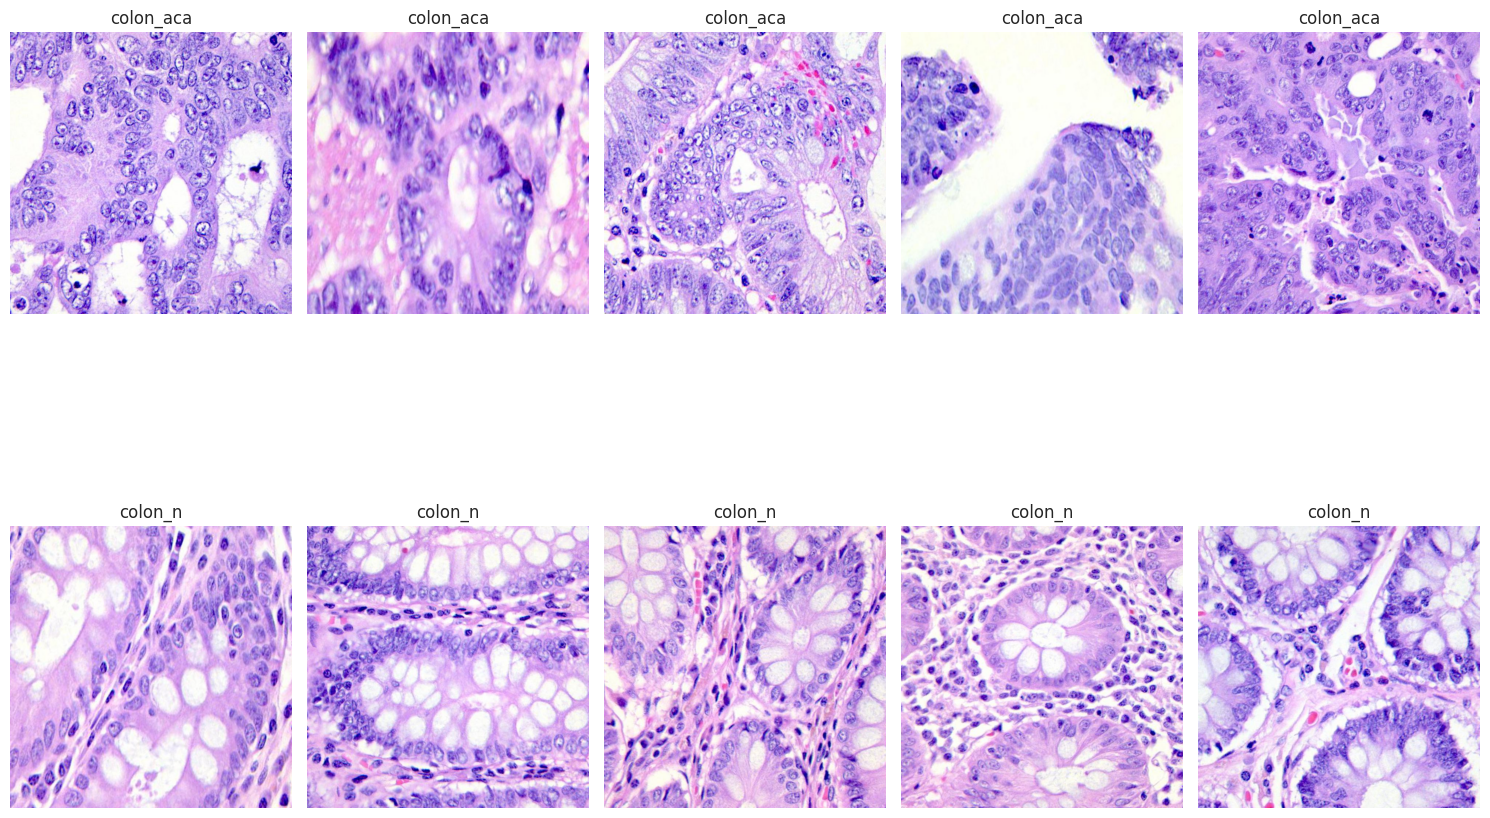

In [18]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

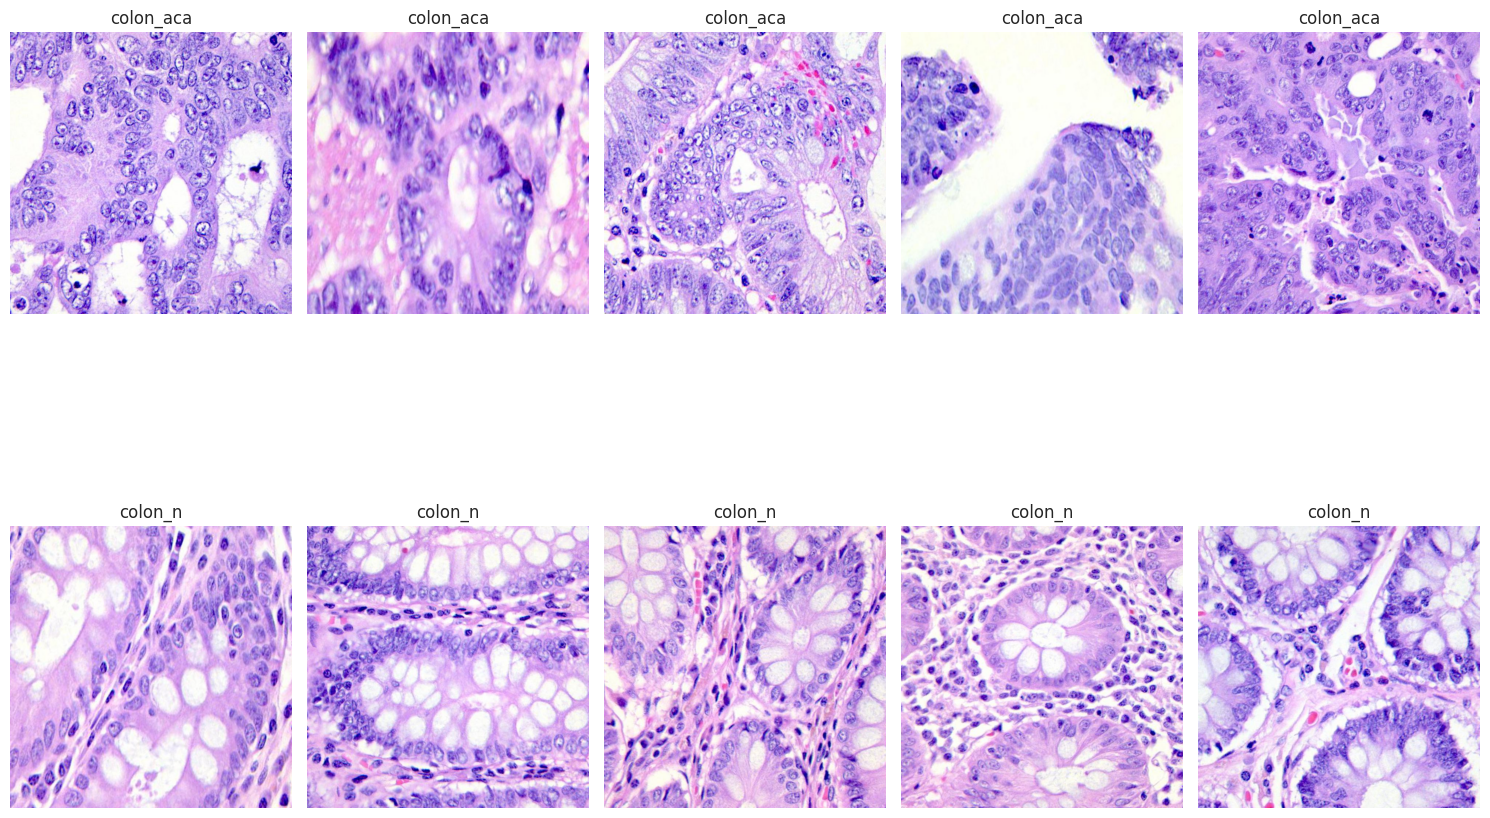

In [19]:
import cv2  # Importing computer vision library

num_images = 5  # Variable representing total number of images to be displayed

plt.figure(figsize=(15, 12)) # Defining figure size
# For loop is to print first five image labels from image_path column provided those image path's corresponding label in the column "label" is categorical. 
for i, category in enumerate(categories): # categories = ["colon_aca","colon_n"]
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]
                          # If category variable is having "colon_aca" in for loop, then corresponding image path is selected. First five image paths are selected
    
    # df[df['label'] == category]: Filters the DataFrame df to include only rows where the value in the label column matches the specified category.
    # ['image_path']: Selects the image_path column from the filtered DataFrame. This column presumably contains the file paths or URLs of the images.
    # .iloc[:num_images]: Selects the first num_images rows from the filtered and selected column. The .iloc method is used for integer-location based indexing.
    # category_images: Stores the resulting image paths in the variable category_images.
    
    # print(category_images)

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
       # img_path: 
         # This is the file path to the image you want to load. 
         # It can be an absolute path (e.g., "/home/user/images/cat.jpg") or a relative path (e.g., "images/cat.jpg").
       # cv2.imread: 
         # This function reads the image from the specified file path and loads it into memory as a NumPy array. 
         # The array represents the pixel values of the image.

       # img: This is the variable that stores the loaded image as a NumPy array. The array has the shape (height, width, channels), where:
       # height: Number of rows (pixels) in the image.
       # width: Number of columns (pixels) in the image.
       # channels: Number of color channels (e.g., 3 for RGB images, 1 for grayscale images).

        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
        #img: This is the input image, typically a NumPy array loaded using cv2.imread. By default, OpenCV loads images in BGR format (Blue-Green-Red).
        #cv2.COLOR_BGR2RGB: This is the color conversion code that tells OpenCV to convert the image from BGR to RGB.
        #This is necessary to convert BGR to RGB because OpenCV uses BGR by default, while most other libraries use RGB.
        #cv2.cvtColor: This function performs the color space conversion. It takes two arguments:
            # - The input image (img).
            # - The color conversion code (cv2.COLOR_BGR2RGB).
        #Return Value:
            # - The function returns a new image (as a NumPy array) where the color channels have been reordered from BGR to RGB.

        plt.subplot(len(categories), num_images, i * num_images + j + 1)# len(categories) = 2/ num_images = 5
                  # (2,5,1) - first image from category_images/ (2,5,2)- second image from category_images... Thus subplots are created
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()  # Only 5 images (num_images=5) are plotted...
plt.show()

# i = [1,2] (["colon_aca", "colon_n"])
# num_images = 5
# j = [1,2,3,4,5]
#                     i * num_images + j + 1 
# case 1 (i=0, j=0) = 0 *   5        + 0 + 1  = 1
# case 2 (i=0, j=1) = 0 *   5        + 1 + 1  = 2
# case 3 (i=0, j=2) = 0 *   5        + 2 + 1  = 3
# case 4 (i=0, j=3) = 0 *   5        + 3 + 1  = 4
# case 5 (i=0, j=4) = 0 *   5        + 4 + 1  = 5

# case 6 (i=1, j=0) = 1 *   5        + 0 + 1  = 6
# case 6 (i=1, j=1) = 1 *   5        + 1 + 1  = 7
# case 6 (i=1, j=2) = 1 *   5        + 2 + 1  = 8
# case 6 (i=1, j=3) = 1 *   5        + 3 + 1  = 9
# case 6 (i=1, j=4) = 1 *   5        + 4 + 1  = 10

In [20]:
# To Label "colon_aca" and "colon_n" as numerical values (0,1) using label_encoder.fit_transform
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])


In [21]:
# Create a dataframe having image path and label encoder value as follows
df = df[['image_path', 'category_encoded']]
df

image_path  category_encoded
0     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
1     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
2     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
3     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
4     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
...                                                 ...               ...
9995  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9996  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9997  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9998  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9999  /kaggle/input/lung-and-colon-cancer-histopatho...                 1

[10000 rows x 2 columns]

In [28]:
len(df[['image_path']])

10000

In [31]:
from imblearn.over_sampling import RandomOverSampler # Here the data is balanced.Infact, oversampling is not required here
#Class imbalance occurs when one or more classes in a dataset have significantly fewer samples than the others. 
#This is common in problems like fraud detection, medical diagnosis, or rare event prediction. 
#Imbalanced datasets can lead to biased models that perform poorly on the minority class.

# RandomOverSampler balances the dataset by randomly oversampling the minority class(es). It does this by:
#Identifying the minority class(es).
#Randomly duplicating samples from the minority class(es) until the class distribution is balanced.

#Key Features
   #Simple and Effective: Easy to implement and often improves model performance on minority classes.
   #Random Sampling: Samples are duplicated randomly, which can lead to overfitting if the dataset is small.
   #Supports Multi-Class: Can handle datasets with more than two classes.

#When to Use RandomOverSampler?
   #When the dataset is moderately imbalanced.
   #When the minority class has enough samples to avoid severe overfitting.
   #As a baseline method before trying more advanced techniques like SMOTE (Synthetic Minority Over-sampling Technique).

# pip install imbalanced-learn  --- Should be installed before using it

# Advantages
    #Balances Class Distribution: Ensures that the model is not biased toward the majority class.
    #Easy to Implement: Requires minimal code and no complex parameter tuning.
    #Works with Any Model: Can be used with any machine learning algorithm.

# Disadvantages
    #Overfitting: Randomly duplicating samples can lead to overfitting, especially if the dataset is small.
    #No New Information: Since it duplicates existing samples, it does not add new information to the dataset.

# Alternatives to RandomOverSampler
    # SMOTE: Generates synthetic samples for the minority class instead of duplicating existing ones.
    # ADASYN: Similar to SMOTE but focuses on generating samples for harder-to-learn minority class examples.
    # Under-Sampling: Reduces the number of samples in the majority class to balance the dataset.
    # Combination of Over- and Under-Sampling: Techniques like SMOTE + Tomek Links or SMOTE + ENN.

# Summary
    # RandomOverSampler is a simple and effective way to handle class imbalance by duplicating minority class samples.
    # It is easy to implement but can lead to overfitting if the dataset is small.
    # Use it as a baseline method before exploring more advanced techniques like SMOTE or ADASYN.
    # Always evaluate the model's performance after resampling to ensure it generalizes well to unseen data.

In [32]:
ros = RandomOverSampler(random_state=42) # random_state=42: This parameter sets the seed for the random number generator used during oversampling. 
        # Setting a random_state ensures that the results are reproducible.
        # Purpose: Controls the randomness of the oversampling process. 
         #Setting a fixed value (e.g., 42) ensures that the same samples are duplicated each time you run the code, making the results reproducible.
     # Reproducibility: Setting a fixed random_state ensures that the oversampling process produces the same results every time you run the code. 
     # This is important for debugging, testing, and sharing results.
     # Consistency: Without a fixed random_state, the samples selected for duplication may vary each time, leading to inconsistent results.
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

# ros.fit_resample():
# This method of the RandomOverSampler class (ros) performs the oversampling.
    # It takes two inputs:
    # X: The feature data (independent variables).
    # y: The target labels (dependent variable).

# df[['image_path']]:
    # This is the feature data (X). It is a DataFrame (or a 2D array-like structure) containing the image_path column, which represents the file paths of the images.

# df['category_encoded']:
    # This is the target label (y). It is a Series (or 1D array-like structure) containing the encoded categories (e.g., numerical labels representing different classes).

# X_resampled, y_resampled:
    # These are the outputs of the fit_resample method.
    # X_resampled: The resampled feature data (oversampled image_path values).
    # y_resampled: The corresponding resampled target labels (oversampled category_encoded values).

In [33]:
# Additional step for checking the size. Not an essential in this project
print(len(df[['image_path']])) # Checking the size of 'image_path' (it is equal to 10000)

10000


In [34]:
# Additional step for checking the size. Not an essential in this project
print(len(X_resampled)) # Checking the size of 'X_resampled' (it is equal to 10000). It is same as 'image_path'

10000


In [40]:
# Creating the dataframe with resampled data. Actually no resampling happened because already it is a balanced data
df_resampled = pd.DataFrame(X_resampled, columns=['image_path']) # Independant variable (X) and column names are defined
df_resampled['category_encoded'] = y_resampled # The target variable is added to dataframe.

df_resampled

image_path  category_encoded
0     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
1     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
2     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
3     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
4     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
...                                                 ...               ...
9995  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9996  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9997  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9998  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9999  /kaggle/input/lung-and-colon-cancer-histopatho...                 1

[10000 rows x 2 columns]

In [41]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts()) # Counting number of elements in each class, total elements are counted and classes are categorised


Class distribution after oversampling:
category_encoded
0    5000
1    5000
Name: count, dtype: int64


In [42]:
df_resampled

image_path  category_encoded
0     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
1     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
2     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
3     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
4     /kaggle/input/lung-and-colon-cancer-histopatho...                 0
...                                                 ...               ...
9995  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9996  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9997  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9998  /kaggle/input/lung-and-colon-cancer-histopatho...                 1
9999  /kaggle/input/lung-and-colon-cancer-histopatho...                 1

[10000 rows x 2 columns]

In [44]:
# Category_encoded contains numerical labels as 0 and 1 for colon_aca & colon_n respectively. 
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str) 

In [ ]:
# Importing the required libraries and optimizers for performing operations on the images. 
from sklearn.model_selection import train_test_split    # Imported the train test split
from sklearn.metrics import confusion_matrix, classification_report   # Metrics for classification is imported

import tensorflow as tf   # 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers 

import warnings
warnings.filterwarnings("ignore")

print ('check')

####### Explanations! = Adam/ImageDataGenerator/Conv2D/MaxPooling2D/Flatten/Dense/Activation/Dropout/BatchNormalization
# Adam :
# Adam is an optimization algorithm in TensorFlow's Keras module, commonly used for training deep learning models. 
# It is an adaptive learning rate optimization algorithm that combines the benefits of AdaGrad and RMSprop.
# # ImageDataGenerator

from tensorflow.keras.optimizers import Adam
# Instantiate the Adam optimizer with a learning rate of 0.001 (default)
optimizer = Adam(learning_rate=0.001)
# Use it while compiling a Keras model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Key Parameters
    # learning_rate (default = 0.001): Controls the step size during optimization.
    # beta_1 (default = 0.9): Exponential decay rate for the first moment estimates.
    # beta_2 (default = 0.999): Exponential decay rate for the second moment estimates.
    # epsilon (default = 1e-7): Small value to prevent division by zero.
# Advantages of Adam
    # Adaptive learning rates for each parameter.
    # Works well for most deep learning models without requiring much hyperparameter tuning.
    # Efficient in terms of computation and memory.
# Details of optimizers are available in seperate colab file

# Conv2D
# MaxPooling2D
# Flatten
# Dense
# Activation
# Dropout
# BatchNormalization

# ***********************************************************************************************
# Additional Explanation  - Lung cancer project halted

In [ ]:
###################The above code for using regularizers are as follows:####################

# The line from tensorflow.keras import regularizers imports the regularizers module from TensorFlow's Keras API. 
# Regularizers are used to apply penalties on layer parameters (e.g., weights) during training to prevent overfitting. 
# Here's a detailed explanation of what regularizers are and how they are used in TensorFlow/Keras:

# What Are Regularizers?
# Regularizers are techniques used to constrain the complexity of a model by adding a penalty to the loss function based on the magnitude of the model's parameters (e.g., weights). This helps prevent overfitting, especially in models with a large number of parameters.
# Keras provides three types of regularizers:
    # L1 Regularization: Penalizes the absolute value of the weights.
    # L2 Regularization: Penalizes the squared value of the weights.
    # L1-L2 Regularization: A combination of L1 and L2 regularization.

# #####  How to Use Regularizers in Keras ########
    # You can apply regularizers to the weights of specific layers in a neural network. For example:
    # Kernel Regularizer: Applies regularization to the weights of the layer.
    # Bias Regularizer: Applies regularization to the bias terms of the layer.
    # Activity Regularizer: Applies regularization to the output of the layer.

# Explanation of the Code
    #1. regularizers.l2(0.01):
        # - This applies L2 regularization with a regularization factor of 0.01.

        # - The regularization term is added to the loss function during training.

    #2. kernel_regularizer:
        # - This argument specifies the regularizer to apply to the weights (kernel) of the layer.

    #3. Layers:
        # - The model has two hidden layers with ReLU activation and L2 regularization, followed by an output layer with softmax activation.

# Types of Regularizers
    # 1. L1 Regularization:
        # - Penalizes the absolute value of the weights.
        # - Encourages sparsity (some weights become exactly zero).
    # Example
    regularizers.l1(0.01)

   # 2. L2 Regularization:

        # - Penalizes the squared value of the weights.
        # - Encourages small weights but not necessarily zero.
   # Example
   regularizers.l2(0.01)

   # 3. L1-L2 Regularization:

        # -Combines L1 and L2 regularization.
   #Example:
     regularizers.l1_l2(l1=0.01, l2=0.01)


# When to Use Regularizers
    # 1. Overfitting:
         # - Use regularizers when your model is overfitting (i.e., performing well on training data but poorly on validation/test data).
    # 2. Large Models:
         # - Regularizers are particularly useful for models with a large number of parameters (e.g., deep neural networks).
    #3. Feature Selection:
        # - L1 regularization can be used for feature selection, as it encourages sparsity.

# Summary
    # Regularizers are used to prevent overfitting by adding a penalty to the loss function based on the magnitude of the model's weights.
    # Keras provides L1, L2, and L1-L2 regularizers.
    # Use regularizers in layers like Dense, Conv2D, etc., by specifying the kernel_regularizer, bias_regularizer, or activity_regularizer arguments.
    # Regularizers are particularly useful for large models or when dealing with overfitting.

# Example: L1 Regularization

In [ ]:
# Example to describe Regularzations

from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a model with L1 regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01), input_shape=(100,)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Example: L1-L2 Regularization

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a model with L1-L2 regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), input_shape=(100,)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# ********************************************************************************************************

# Lung Cancer project continuing

In [ ]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,      # This is the full dataset that we want to split.
    train_size=0.8,    # 80% of the data goes into the training set (train_df_new), and the remaining 20% goes into temp_df_new.
    shuffle=True,      # The data is shuffled before splitting to ensure randomness.
    random_state=42,   # Setting this ensures that the split is reproducible—if you run the code again, you'll get the same split.
    stratify=df_resampled['category_encoded']  #  Ensures that "the proportion of each class (category) remains the same" in both the training and temporary datasets. 
                                               # This is useful for "balanced class distribution", especially in classification problems.
)
# Why Use Stratification?
# If the dataset has imbalanced categories (e.g., some categories appear more frequently than others), 
# using stratification ensures that both training and testing sets have the same category proportions as the original dataset.

# 3. Output Variables
   # train_df_new → 80% of the data, used for training the model.
   # temp_df_new → 20% of the data, which can later be split further into validation and test sets.

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [ ]:
#******************************************************************************************************

# This code is setting up image preprocessing and data augmentation using 
# ImageDataGenerator from Keras (part of TensorFlow). 

# 1. Defining Image Properties
batch_size = 16   # The number of images processed together in one batch during training.
img_size = (256, 256) #  Each image is resized to 256x256 pixels before being fed into the model.
channels = 3 # The number of color channels (3 means RGB images). 
img_shape = (img_size[0], img_size[1], channels) # This is the shape of an individual image, used for defining the input layer of a model.
#*****************************************************************************************************************

# 2. Creating Image Data Generators
# These lines create image generators for loading and preprocessing images.
#**********************************************************************************************************
tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

# What is ImageDataGenerator?
# It is a TensorFlow/Keras utility that automatically loads, resizes, normalizes, and augments images in real-time during training.
# It helps in efficiently handling large datasets stored in directories.
# Parameters Used
# rescale=1./255 → Normalizes pixel values from [0, 255] to [0, 1], which helps the neural network train more efficiently.

# Why Use ImageDataGenerator?
  #  - Saves memory by loading images in batches instead of all at once.
  #  - Preprocesses images on the fly, ensuring consistency.
  #  - Can apply data augmentation (e.g., rotation, zoom, flipping) to improve model generalization.


#**********************************************************************************************************
# Your code snippet uses flow_from_dataframe from Keras' ImageDataGenerator to create a data generator for training a binary classification model.

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,   # Pandas DataFrame containing file paths and corresponding class labels.
    x_col='image_path',   #  Specifies the column containing image file paths.
    y_col='category_encoded',   #  Specifies the column containing class labels (encoded as binary values: 0 or 1).  
    target_size=img_size,  # Resizes images to the given dimensions (e.g., (224, 224) for ResNet or (256, 256) for other CNNs).
    class_mode='binary',   #  Used for binary classification (for multi-class, use 'categorical').
    color_mode='rgb',      # Loads images in RGB format (use 'grayscale' for black-and-white images).
    shuffle=True,          # Shuffles images to prevent the model from learning any order bias.
    batch_size=batch_size  # Specifies how many images are processed at a time during training.
)

# ***************************************************************************************************************************
# Your valid_gen_new data generator is similar to train_gen_new, but it's meant for validation.

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,  # DataFrame containing image paths & labels for validation.
    x_col='image_path',  #  Column containing the image file paths.
    y_col='category_encoded',   # Encoded category labels (0 or 1).  
    target_size=img_size, #  Resizes images (e.g., (224, 224) or (256, 256)).
    class_mode='binary',  # Since it's binary classification (0 or 1).
    color_mode='rgb', #   Loads images in RGB format (3 channels).
    shuffle=True, # Shuffles data for validation (consider setting False for reproducibility).
    batch_size=batch_size # Defines batch size for validation.
)

# ******************************************************************************************************************************
# Your test_gen_new data generator is structured correctly for testing.

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new, # DataFrame containing image paths & labels for testing.
    x_col='image_path', # Column containing image file paths.
    y_col='category_encoded',  # Column containing encoded labels (0 or 1).   
    target_size=img_size, # Resizes images (e.g., (224, 224) or (256, 256)).
    class_mode='binary',  # Binary classification (0 or 1).
    color_mode='rgb', #  Uses RGB format (3 channels).
    shuffle=False,  # Keep shuffle=False for consistent results during testing.
    batch_size=batch_size # Defines batch size for inference.
)

# What is flow_from_dataframe?
# flow_from_dataframe is a method from TensorFlow Keras' ImageDataGenerator that allows you to load images from a Pandas DataFrame instead of a folder structure. 
# It is useful when:
# Your image paths and labels are stored in a CSV file or Pandas DataFrame.
# You don't have a standard folder structure like:
   /data/
       /class_0/
       /class_1/

# You want more flexibility in handling your dataset.

# **Additional Section for syntax of Image Data Generator & flow_from_dataframe**

In [ ]:
# Syntax of Image Data Generator:

# Create ImageDataGenerator with Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Syntax of flow_from_dataframe
    flow_from_dataframe(
    dataframe,      # Pandas DataFrame containing image paths & labels
    directory,      # (Optional) Root directory for relative paths
    x_col,          # Column containing image paths
    y_col,          # Column containing labels
    target_size,    # Resize images to (height, width)
    class_mode,     # Type of classification: "binary", "categorical", "input", or None
    color_mode,     # "rgb" (default) or "grayscale"
    batch_size,     # Number of images per batch
    shuffle,        # Whether to shuffle the dataset
    seed,           # Random seed for shuffling
    subset,         # If using a validation split: "training" or "validation"
    interpolation   # How to resize images (e.g., "nearest", "bilinear")
)

# 📊 When to Use flow_from_dataframe?

✅ When images are stored in different folders, and a CSV file provides paths.
    
✅ When the dataset does not follow a folder-based structure.
    
✅ When you want more control over how images are loaded.

In [ ]:
# Setting up a Convolutional Neural Network (CNN) using TensorFlow Keras, possibly integrating ResNet50 with additional layers.

from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, Multiply, Reshape, BatchNormalization, Activation
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

 # ***********************SHORT BREAK strarts FROM THE PROJECT FOR EXPLANATION***********************************


                              
**Explanation of **
1. Conv2D,
2. GlobalAveragePooling2D,
3. Dense,
4. Multiply,
5. Reshape,
6. BatchNormalization,
7. Activation

**1️⃣ Conv2D (Convolutional Layer)**

    - Purpose: Extracts spatial features from images by applying filters (kernels).
    - How it works: Uses small filters (e.g., 3x3, 5x5) to detect patterns like edges, textures, and shapes.

In [ ]:
# Example:

Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu")

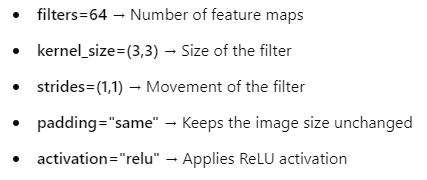

**2️⃣ GlobalAveragePooling2D (GAP Layer)**

- Purpose: Reduces each feature map to a single value by averaging all pixels.

- Why? Reduces dimensionality while keeping important information.

In [ ]:
# Example:

# python code
GlobalAveragePooling2D()

- Converts a (7, 7, 512) feature map into (1, 512).

🔹 Used in ResNet, MobileNet, EfficientNet instead of Flatten to prevent overfitting.

**3️⃣ Dense (Fully Connected Layer)**

Purpose: Standard neural network layer where each neuron is connected to all neurons in the previous layer.

In [ ]:
# Example:

Dense(units=256, activation="relu")

- units=256 → Number of neurons
- activation="relu" → Applies ReLU activation

🔹 Last layer in classification models usually uses:

In [ ]:
Dense(units=1, activation="sigmoid")  # For binary classification
Dense(units=10, activation="softmax")  # For multi-class classification

**4️⃣ Multiply (Element-wise Multiplication)**

- Purpose: Multiplies two tensors element-wise.
- Commonly used in: Attention mechanisms like Squeeze-and-Excitation (SE) or CBAM.

In [ ]:
# Example (Applying Attention to Features):
attention = Multiply()([feature_map, attention_weights]) # Multiplies feature_map with attention_weights to highlight important features.

**5️⃣ Reshape (Tensor Reshaping)**

- Purpose: Changes the shape of a tensor without modifying its values.

Example (Reshaping a GAP output for SE block):

In [ ]:
Reshape((1, 1, 512))(x) # Converts a (512,) vector into (1, 1, 512) for attention operations.

**6️⃣ BatchNormalization (BN)**

- Purpose: Normalizes activations across mini-batches to improve stability & speed up training.

In [ ]:
# Example:

BatchNormalization()(x)

- Applied after a Conv2D or Dense layer to stabilize training.
- Reduces internal covariate shift, prevents vanishing/exploding gradients.

# 7️⃣ Activation (Applying Activation Functions)

- Purpose: Adds non-linearity to the network.

In [ ]:
# Common Activation Functions:

Activation("relu")(x)   # ReLU for hidden layers
Activation("sigmoid")(x)  # Sigmoid for binary classification
Activation("softmax")(x)  # Softmax for multi-class classification


- ReLU: Removes negative values (faster training).
  
- Sigmoid: Maps output between 0-1 (used in binary classification).

  
- Softmax: Converts logits into probabilities (multi-class classification).

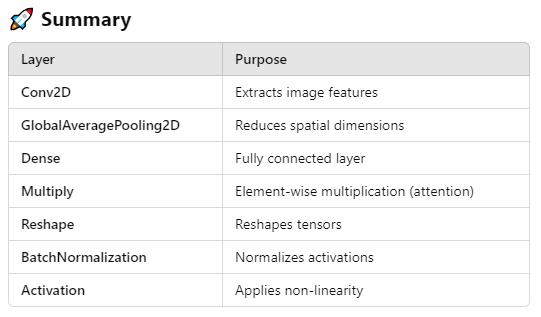

 # ***********************SHORT BREAK Ends FROM THE PROJECT FOR EXPLANATION************************************

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # checks how many GPUs are available for TensorFlow.

# 🔹 tf.config.list_physical_devices('GPU') → Lists all available GPUs.
# 🔹 len(...) → Counts the number of GPUs detected.

# ********************* Short Break starts from Project ***********************

# **🔧 How to Enable GPU Acceleration?**

1️⃣ Check if TensorFlow recognizes GPU

In [2]:
import tensorflow as tf
tf.test.is_gpu_available()

# or

tf.test.is_built_with_cuda()

True

2️⃣ Ensure GPU drivers and CUDA are installed

 -  Install NVIDIA GPU drivers
 -  Install CUDA Toolkit & cuDNN

In [6]:
# Ensure TensorFlow is installed with GPU support:

pip install tensorflow-gpu

SyntaxError: invalid syntax (<ipython-input-6-6d31301829b8>, line 3)

3️⃣ Check GPU usage during training

In [8]:
tf.debugging.set_log_device_placement(True)


# ***************************** Short Break Ends  ***********************

In [5]:
# This code is configuring GPU memory growth for TensorFlow, which helps prevent out-of-memory (OOM) errors by dynamically allocating GPU memory as needed.
# 🔹 What This Does
   # ✔️ Checks for available GPUs
   # ✔️ Enables memory growth, meaning TensorFlow only uses memory as needed instead of allocating all at once.
   # ✔️ Prevents Out-of-Memory (OOM) issues when running multiple processes on the GPU.


gpus = tf.config.list_physical_devices('GPU')  # Lists all available GPUs.
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Enable dynamic memory growth
        print("GPU is set for TensorFlow")
    except RuntimeError as e:
        print(e) # # Print error if memory growth setting fails

GPU is set for TensorFlow


# *********************** ADDITIONAL Details starts (For TensorFlow) *****************************
# Alternative (Recommended for TensorFlow 2.9+)

Since TensorFlow 2.9+, you can set memory growth like this:

✔️ This approach is useful if you want to set a specific memory limit instead of enabling full dynamic growth.

In [ ]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_logical_device_configuration(
            gpus[0],
            [tf.config.LogicalDeviceConfiguration(memory_limit=4096)]  # Limit GPU memory to 4GB
        )
        print("GPU memory limit set to 4GB")
    except RuntimeError as e:
        print(e)


# *************** ADDITIONAL Details Ends (For TensorFlow)*****************¶

In [ ]:
from tensorflow.keras.layers import Add  # Add Layer in TensorFlow Keras

# The Add layer in Keras is used for element-wise addition of tensors. 
# It is commonly used in ResNet architectures for skip connections (residual connections).

# 🔹 How Add Works
   # ✔️ Takes two or more tensors of the same shape and adds them element-wise.
   #  ✔️ Used in ResNet-style skip connections for better gradient flow.
   #  ✔️ Helps prevent vanishing gradients in deep networks.

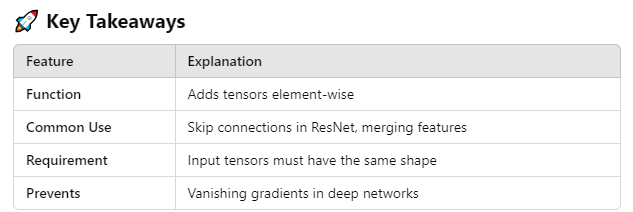

In [ ]:
from tensorflow.keras.layers import Add, GlobalAveragePooling2D, Dense, BatchNormalization, Reshape, Multiply, Input, UpSampling2D


**Explanation of Add, GlobalAveragePooling2D, Dense, BatchNormalization, Reshape, Multiply, Input, UpSampling2D**

In [ ]:
# 1️⃣ Add()
    # 🔹 Performs element-wise addition of input tensors.
    # 🔹 Used in ResNet-style skip connections to improve gradient flow.
    # 🔹 Inputs must have the same shape.
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# ✅ Example (Skip Connection in ResNet Block)
from tensorflow.keras.layers import Add, Conv2D, Input
from tensorflow.keras.models import Model

inputs = Input(shape=(32, 32, 64))
x = Conv2D(64, (3,3), padding="same", activation="relu")(inputs)
x = Conv2D(64, (3,3), padding="same")(x)

# Skip connection (Adding input to output)
x = Add()([x, inputs])

model = Model(inputs, x)
model.summary()
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$




# 2️⃣ GlobalAveragePooling2D()
    # 🔹 Averages feature maps across spatial dimensions (height & width).
    # 🔹 Converts (H, W, C) → (C,), reducing computation while keeping key features.
    # 🔹 Used in classification models like MobileNet, ResNet, etc.
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# ✅ Example (Replacing Flatten())
from tensorflow.keras.layers import GlobalAveragePooling2D
x = GlobalAveragePooling2D()(inputs)  # Output shape: (batch_size, channels)

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$




# 3️⃣ Dense(units, activation)
    # 🔹 Fully connected neural network layer.
    # 🔹 units: Number of neurons.
    # 🔹 activation: Activation function (e.g., relu, sigmoid, softmax).
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# ✅ Example
from tensorflow.keras.layers import Dense
x = Dense(128, activation="relu")(x)  # 128 neurons with ReLU activation
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$




# 4️⃣ BatchNormalization()
   # 🔹 Normalizes activations across a batch, improving training stability.
   # 🔹 Reduces internal covariate shift.
   # 🔹 Used before or after activation functions.
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# ✅ Example
from tensorflow.keras.layers import BatchNormalization
x = BatchNormalization()(x)  # Normalizing features
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$




# 5️⃣ Reshape(target_shape)
    # 🔹 Reshapes tensors without changing data.
    # 🔹 Common in CNN-to-Fully Connected transitions.
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# ✅ Example (Reshape for Fully Connected Layers)
from tensorflow.keras.layers import Reshape
x = Reshape((8, 8, 64))(x)  # Convert (batch_size, 4096) → (batch_size, 8, 8, 64)
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$




# 6️⃣ Multiply()
    # 🔹 Performs element-wise multiplication between input tensors.
    # 🔹 Used in attention mechanisms & feature recalibration (e.g., SE-Net).

# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# ✅ Example (Squeeze-and-Excitation Attention)
from tensorflow.keras.layers import Multiply

se = Dense(64, activation="sigmoid")(x)  # Compute attention weights
x = Multiply()([x, se])  # Apply attention weights
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$



# 7️⃣ Input(shape)
#🔹 Defines the input tensor for a model.
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# ✅ Example
from tensorflow.keras.layers import Input
inputs = Input(shape=(224, 224, 3))  # Image input
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$



# 8️⃣ UpSampling2D(size=(2,2))
    # 🔹 Increases spatial resolution (height & width) of a feature map.
    # 🔹 Used in image super-resolution & segmentation.
    # 🔹 Upsamples by repeating pixels, unlike Conv2DTranspose(), which learns upsampling.
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# ✅ Example (Upsampling 2× in U-Net)
from tensorflow.keras.layers import UpSampling2D
x = UpSampling2D(size=(2,2))(x)  # Doubles H & W
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


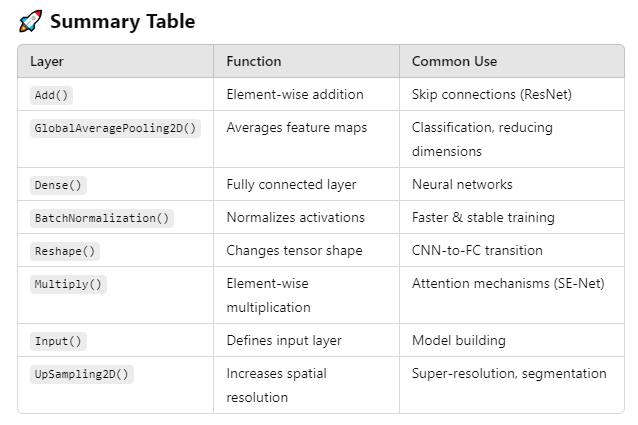

In [ ]:
# This code defines and builds a Modified Residual Attention Network (MRANet) using a ResNet50 backbone. 
# The model leverages attention mechanisms to focus on important features and uses skip connections for improved learning. 

# Key Components in the Code
    # ✅ ResNet50 as the backbone → Pretrained model for feature extraction.
    # ✅ Attention Blocks → Used to enhance feature maps from ResNet.
    # ✅ Feature Merging → Combines attention-enhanced feature maps.
    # ✅ Global Average Pooling & Fully Connected Layers → Classification head.


$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 1️⃣ Importing Necessary Libraries

from tensorflow.keras.layers import Add, GlobalAveragePooling2D, Dense, BatchNormalization, Reshape, Multiply, Input, Conv2D, UpSampling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K  

# 🔹 Keras Layers Used:

    # - Add → Skip connections.
    # - GlobalAveragePooling2D → Reduces feature maps to a single vector.
    # - Dense → Fully connected layers for classification.
    # - BatchNormalization → Normalizes activations.
    # - Reshape → Reshapes tensors for attention.
    # - Multiply → Element-wise multiplication for attention.
    # - Conv2D → 2D convolution.
    # - UpSampling2D → Upsamples feature maps.

🔹 Keras Utilities:

    # - ResNet50 → Pretrained model.
    # - Model → Defines the final model.
    # - Adam → Optimizer.
    # - K → Backend functions for tensor operations.

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 2️⃣ Attention Block (Feature Enhancement)

# 🔹 What This Does:

#      - Squeeze: Uses GlobalAveragePooling2D() to create a feature descriptor.
#      - Excitation: Uses a small Dense network to determine which features are important.
#      - Reshape & Multiply: Applies attention weights to enhance relevant features.
    
# 🔹 Inspired by: Squeeze-and-Excitation Networks (SE-Net).

def attention_block(inputs, filters):  
    x = GlobalAveragePooling2D()(inputs) # Squeeze: Convert (H, W, C) → (C,)
    x = Dense(filters // 16, activation='relu')(x) # Reduce dimensions
    x = Dense(filters, activation='sigmoid')(x) # Scale features
    x = Reshape((1, 1, filters))(x) # Reshape to match feature map
    return Multiply()([inputs, x]) # Apply attention (Feature recalibration)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 3️⃣ Building the MRANet Model

# 🔹 ResNet50 Backbone:

    # - Loads a pretrained ResNet50 model.
    # - include_top=False → Removes fully connected layers.
    # - Uses input_tensor=Input(shape=input_shape) as input.

def build_mranet(input_shape=(256, 256, 3), num_classes=2):
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 4️⃣ Extracting Feature Maps from ResNet50

# 🔹 Extracts high-level features from two ResNet layers:

   #  1. conv4_block6_out → 1024 filters (mid-level features).
   #  2. conv5_block3_out → 2048 filters (high-level features).
    
    conv4_block6_out = base_model.get_layer('conv4_block6_out').output
    conv5_block3_out = base_model.get_layer('conv5_block3_out').output
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 5️⃣ Applying Attention Mechanism
    
    attn_block1 = attention_block(conv4_block6_out, filters=1024)
    attn_block2 = attention_block(conv5_block3_out, filters=2048)
# 🔹 Enhances extracted features using the attention_block() function.
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# 6️⃣ Feature Processing

    # 🔹 Feature Adjustment

    #     - 1×1 Convolution → Reduces filters from 2048 → 1024.
    #     - Upsampling → Matches spatial dimensions of attn_block1.


    attn_block2 = Conv2D(1024, (1, 1), padding='same', activation='relu')(attn_block2)

    attn_block2 = UpSampling2D((2, 2))(attn_block2)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# 7️⃣ Debugging Shapes

    attn_block1_shape = K.int_shape(attn_block1)
    attn_block2_shape = K.int_shape(attn_block2)
    print("Shape of attn_block1:", attn_block1_shape)
    print("Shape of attn_block2:", attn_block2_shape)
# 🔹 Ensures that both tensors have the same shape before addition.
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# 8️⃣ Merging Features
    merged_attention = Add()([attn_block1, attn_block2])
 # 🔹 Element-wise addition of the two attention-enhanced feature maps.
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 🔹 Final Processing

    # GlobalAveragePooling2D() → Converts features into a single vector.
    # Dense(512, activation='relu') → Fully connected layer.
    # Dropout(0.5) → Prevents overfitting.
    # BatchNormalization() → Normalizes activations.
    # Dense(1, activation='sigmoid') → Outputs 1 neuron for binary classification.

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 9️⃣ Final Classification Layers
    x = GlobalAveragePooling2D()(merged_attention)  # Reduce spatial dimensions
    x = Dense(512, activation='relu')(x) # Fully connected layer
    x = Dropout(0.5)(x) # Prevent overfitting
    x = BatchNormalization()(x)  # Normalize activations
    x = Dense(1, activation='sigmoid')(x) # Binary classification output

    model = Model(inputs=base_model.input, outputs=x)
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 🔟 Freezing Pretrained Layers
    # 🔹 Freezes ResNet50 layers to retain pretrained knowledge.
   
    for layer in base_model.layers:
        layer.trainable = False
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$        

# 1️⃣1️ Creating & Compiling the Model

# 🔹 Model Compilation

        # - Uses Adam optimizer (learning_rate=0.0001).
        # - Uses Binary Crossentropy (since we have two classes).
        # - Tracks accuracy during training.

    return model
mranet_model = build_mranet()
mranet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',  
    metrics=['accuracy'])

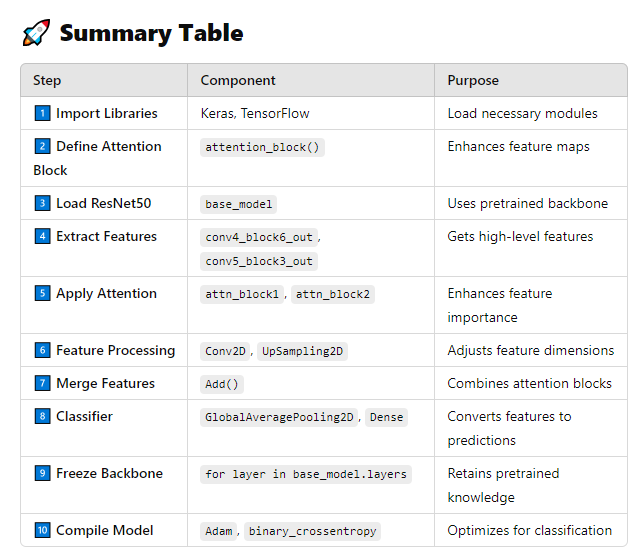

🔥 Key Takeaways

    ✅ Uses ResNet50 as a feature extractor.
    
    ✅ Applies attention mechanism to focus on important features.
    
    ✅ Combines multiple feature maps with skip connections (Add()).
    
    ✅ Uses a fully connected layer for classification.
    
    ✅ Freezes pretrained ResNet layers to prevent overfitting.

# **(Image Data Pipeline with Error Handling)**

This code defines an image data pipeline for training a deep learning model using ImageDataGenerator from Keras. It also includes a custom generator (my_image_check) that validates images before passing them to the model.

In [ ]:
# 🚀 Key Components in the Code
    # ✅ ImageDataGenerator → Loads images and applies preprocessing.
    # ✅ flow_from_dataframe() → Generates batches from a Pandas dataframe.
    # ✅ my_image_check() → Custom generator to check for corrupt images.
    # ✅ Training, Validation, and Test Generators → Handles different datasets.
    # ✅ Error Handling → Detects and skips corrupted images.

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 1️⃣ Importing Necessary Libraries
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
    # 🔹 PIL.Image → Used to verify if images are corrupted.
    # 🔹 numpy → Used for array operations.
    # 🔹 ImageDataGenerator → Generates image batches with real-time augmentation.
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# 2️⃣ Custom Generator: my_image_check()
def my_image_check(generator):  
    while True:
        x, y = next(generator) 
        new_x = []
        new_y = []
        for i in range(x.shape[0]):  
            try:
                img = Image.fromarray((x[i] * 255).astype(np.uint8))
                img.verify()
                new_x.append(x[i])
                new_y.append(y[i])
            except Exception as e:
                print(f"Error loading image: {generator.dataframe['image_path'].iloc[generator.index + i] if (generator.index + i) < len(generator.dataframe) else 'Path information not available'}") 
                print(f"Error: {e}")
        yield np.array(new_x), np.array(new_y)

# 🔹 What This Does
    # - Gets a batch of images (x) and labels (y) from ImageDataGenerator.
    # - Loops through each image in the batch:
        # - Converts the image into a PIL image.
        # - Calls img.verify() to check if the image is corrupt.
        # - If valid, adds it to new_x and new_y.
        # - If corrupt, prints an error message and skips the image.
# Yields cleaned batches (removing corrupted images).

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 3️⃣ Creating ImageDataGenerator for Data Augmentation

    # 🔹 Why rescale=1./255?

    # Converts pixel values from [0, 255] to [0, 1] for better model performance.

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 4️⃣ Creating the Training Generator

# 🔹 flow_from_dataframe() Parameters

    # - train_df_new → Dataframe with image paths (x_col) and labels (y_col).
    # - target_size=img_size → Resizes images to match the model input size.
    # - class_mode='binary' → For binary classification (0 or 1).
    # - color_mode='rgb' → Loads images in RGB format.
    # - shuffle=True → Shuffles images in each epoch.
    # - batch_size=batch_size → Defines batch size for training.

# 🔹 Error Handling:

    # - The generator is passed through my_image_check() to filter out corrupt images.

train_generator = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    stratify=df_resampled['category_encoded'] 
)
train_gen_new = my_image_check(train_generator)  

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 5️⃣ Creating Validation and Test Generators

    # Same as train_generator but for validation data.
    # Uses ts_gen (same preprocessing but without augmentation).


valid_generator = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    stratify=df_resampled['category_encoded'] 
)

valid_gen_new = my_image_check(valid_generator)  

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
    # - Same as valid_generator but for test data.
    # - shuffle=False → Ensures that test images are processed in order.

test_generator = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size,
    stratify=df_resampled['category_encoded'] 
)

test_gen_new = my_image_check(test_generator)  

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# 6️⃣ Calculating Steps Per Epoch
    # Defines steps per epoch for training and validation.
    # // ensures the result is an integer (number of batches per epoch).

steps_per_epoch = len(train_df_new) // batch_size
validation_steps = len(valid_df_new) // batch_size

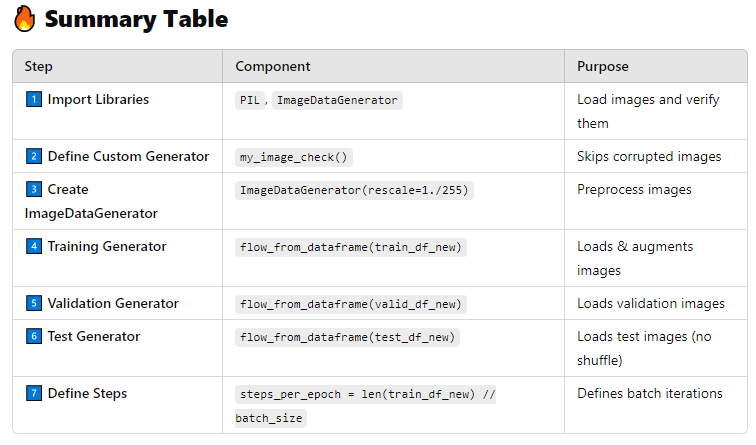

🔥 Key Takeaways

✅ Uses ResNet50 as a feature extractor.

✅ Applies attention mechanism to focus on important features.

✅ Combines multiple feature maps with skip connections (Add()).

✅ Uses a fully connected layer for classification.

✅ Freezes pretrained ResNet layers to prevent overfitting.

In [ ]:
# This line of code trains the MRANet model using the custom image generator pipeline (train_gen_new) while validating it with valid_gen_new.

# 1️⃣ What Happens During fit()?

history = mranet_model.fit(
    train_gen_new, # Training data generator
    epochs=10,   # Train for 10 epochs
    validation_data=valid_gen_new, # Validation data generator
    steps_per_epoch=steps_per_epoch, # Number of training batches per epoch
    validation_steps=validation_steps, # Number of validation batches per epoch
)

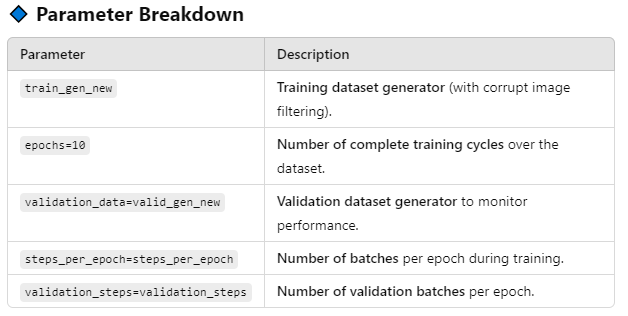

# 2️⃣ What is history?
The history object stores metrics collected during training, including:

    - Training loss & accuracy
    - Validation loss & accuracy
    - Epoch-wise statistics
    
🔹 How to Plot Training Progress
    After training, you can visualize loss and accuracy:

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = test_generator.classes  
y_pred = mranet_model.predict(test_generator)
y_pred_classes = np.round(y_pred).astype(int)  

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Colon_aca', 'Colon_n'], yticklabels=['Colon_aca', 'Colon_n'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred_classes))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Add, GlobalAveragePooling2D, Dense, BatchNormalization, Reshape, Multiply, Input, Conv2D, UpSampling2D, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

def se_block(input_tensor, ratio=8):
    channels = input_tensor.shape[-1]
    se = GlobalAveragePooling2D()(input_tensor)
    se = Dense(channels // ratio, activation='relu')(se)
    se = Dense(channels, activation='sigmoid')(se)
    se = Reshape((1, 1, channels))(se)
    return Multiply()([input_tensor, se])

def build_mranet(input_shape=(256, 256, 3), num_classes=1):
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))

    conv4_block6_out = base_model.get_layer('conv4_block6_out').output
    conv5_block3_out = base_model.get_layer('conv5_block3_out').output

    attn_block1 = se_block(conv4_block6_out, ratio=8)
    attn_block2 = se_block(conv5_block3_out, ratio=8)

    attn_block2 = Conv2D(1024, (3, 3), dilation_rate=(2, 2), padding='same', activation='relu')(attn_block2)
    attn_block2 = UpSampling2D((2, 2))(attn_block2)

    attn_block1 = Conv2D(1024, (1, 1), padding='same', activation='relu')(attn_block1)  # Match channels

    merged_attention = Add()([attn_block1, attn_block2])

    x = GlobalAveragePooling2D()(merged_attention)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=x)

    for layer in base_model.layers[-10:]:
        layer.trainable = True

    return model

mranet_model = build_mranet()

mranet_model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

In [ ]:
history = mranet_model.fit(
    train_gen_new,
    epochs=5,
    validation_data=valid_gen_new,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
)

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [ ]:
y_true = test_generator.classes  
y_pred = mranet_model.predict(test_generator)
y_pred_classes = np.round(y_pred).astype(int)  

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Colon_aca', 'Colon_n'], yticklabels=['Colon_aca', 'Colon_n'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_true, y_pred_classes))